# FAIR2Adapt Case Study 1

## Context

### Purpose

The goal is to experiment with how to read NorESM data for FAIR2Adapt Case Study 1.

### Description

In this notebook, we will:
- Open online NorESM data 
- Visualize one field

## Contributions

### Notebook
- Anne Fouilloux, Simula Research Laboratory (Norway) (reviewer), @annefou

## Bibliography and other interesting resources

- [The Norwegian Earth System Model (NorESM)](https://noresm-docs.readthedocs.io/en/latest/)

## Import Libraries

In [1]:
# Install xarray-healpy and dggs libraries for regridding
#!pip install git+https://github.com/IAOCEA/xarray-healpy.git git+https://github.com/xarray-contrib/xdggs.git cmcrameri s3fs shapely

In [2]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import s3fs  # For accessing file storage at Amazon S3
import xarray as xr  # N-dimensional arrays with dimension, coordinate and attribute labels

xr.set_options(display_expand_data=False, display_expand_attrs=False, keep_attrs=True)

## Open file with Xarray
- The file is on the cloud (accessible to everyone)
- The first time, opening the atmosphere ds typically takes a few minutes
- Therefore, we save a local version with selected subset of variables for faster loading the nezxt times

In [3]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = "s3://CS1/data/model/JRAOC20TRNRPv2_hm_sst_2010-01.nc"

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

<xarray.Dataset> Size: 554kB
Dimensions:  (time: 1, y: 385, x: 360)
Coordinates:
  * time     (time) object 8B 2010-01-17 00:00:00
Dimensions without coordinates: y, x
Data variables:
    sst      (time, y, x) float32 554kB ...

## Load grid

In [4]:
grid_type = "p"
grid_file = "s3://CS1/data/grid/grid.nc"
grid = xr.open_dataset(s3.open(grid_file))
grid

<xarray.Dataset> Size: 75MB
Dimensions:  (pcomp: 86708, qcomp: 88239, ucomp: 88642, vcomp: 87942, y: 385,
              x: 360, nv: 4)
Coordinates:
  * pcomp    (pcomp) int32 347kB 3667 3668 3670 3671 ... 138559 138560 138561
  * qcomp    (qcomp) int32 353kB 3668 3671 3672 3673 ... 138560 138561 138562
  * ucomp    (ucomp) int32 355kB 3667 3668 3669 3670 ... 138560 138561 138562
  * vcomp    (vcomp) int32 352kB 3667 3668 3670 3671 ... 138560 138561 138562
Dimensions without coordinates: y, x, nv
Data variables: (12/53)
    insw     (y, x) int32 554kB ...
    jnsw     (y, x) int32 554kB ...
    ins      (y, x) int32 554kB ...
    jns      (y, x) int32 554kB ...
    inse     (y, x) int32 554kB ...
    jnse     (y, x) int32 554kB ...
    ...       ...
    vdepth   (y, x) float64 1MB ...
    pmask    (y, x) int32 554kB ...
    umask    (y, x) int32 554kB ...
    vmask    (y, x) int32 554kB ...
    qmask    (y, x) int32 554kB ...
    cplmask  (y, x) int32 554kB ...
Attributes: (1)

## Assign coordinates to Xarray Dataset

In [5]:
ds = ds.assign_coords({"lon": grid[grid_type + "lon"]})
ds = ds.assign_coords({"lat": grid[grid_type + "lat"]})
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 1, y: 385, x: 360)
Coordinates:
  * time     (time) object 8B 2010-01-17 00:00:00
    lon      (y, x) float64 1MB ...
    lat      (y, x) float64 1MB ...
Dimensions without coordinates: y, x
Data variables:
    sst      (time, y, x) float32 554kB ...

## Quick visualization

Text(0.5, 1.0, 'Sea Surface Temperature')

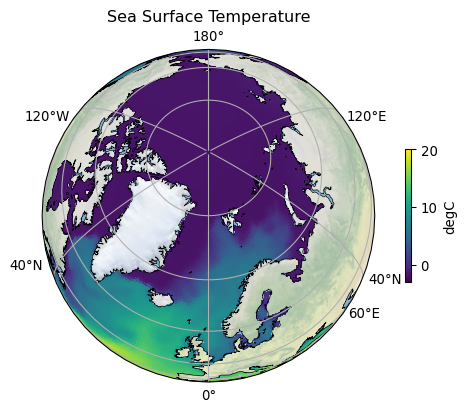

In [6]:
var = "sst"
vmin = -3
vmax = 20
proj = ccrs.NearsidePerspective(
    central_longitude=0.0, central_latitude=80.0, satellite_height=3e6
)
fig, ax = plt.subplots(1, figsize=(8, 4.5), dpi=96, subplot_kw={"projection": proj})

p = (
    ds[var]
    .isel(time=0)
    .plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        x="lon",
        y="lat",
        add_colorbar=False,
        vmin=vmin,
        vmax=vmax,
        cmap="viridis",
        shading="auto",
        rasterized=True,
    )
)
# Add coastlines and the lat-lon grid
ax.coastlines(resolution="50m", color="black", linewidth=0.5)
ax.stock_img()
gl = ax.gridlines(ylocs=range(15, 76, 15), draw_labels=True)
gl.ylocator = mpl.ticker.FixedLocator([40, 50, 60, 70, 80])

plt.colorbar(p, fraction=0.2, shrink=0.4, label="degC")

ax.set_title("Sea Surface Temperature")

In [7]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = "s3://CS1/data/model/JRAOC20TRNRPv2_hm_U236GF_2010-2018.nc"

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

<xarray.Dataset> Size: 3GB
Dimensions:     (sigma: 53, depth: 70, bounds: 2, lat: 171, region: 4,
                 section: 17, time: 108, y: 385, x: 360)
Coordinates:
  * sigma       (sigma) float64 424B 27.22 27.72 28.2 28.68 ... 37.48 37.58 37.8
  * depth       (depth) float64 560B 0.0 5.0 10.0 ... 6.25e+03 6.5e+03 6.75e+03
  * lat         (lat) float64 1kB -80.0 -79.0 -78.0 -77.0 ... 88.0 89.0 90.0
  * region      (region) |S50 200B b'atlantic_arctic_ocean                   ...
  * section     (section) |S50 850B b'barents_opening                        ...
  * time        (time) object 864B 2010-01-17 00:00:00 ... 2018-12-17 00:00:00
Dimensions without coordinates: bounds, y, x
Data variables:
    depth_bnds  (depth, bounds) float64 1kB ...
    U236GF      (time, sigma, y, x) float32 3GB ...

In [8]:
ds.U236GF

<xarray.DataArray 'U236GF' (time: 108, sigma: 53, y: 385, x: 360)> Size: 3GB
[793346400 values with dtype=float32]
Coordinates:
  * sigma    (sigma) float64 424B 27.22 27.72 28.2 28.68 ... 37.48 37.58 37.8
  * time     (time) object 864B 2010-01-17 00:00:00 ... 2018-12-17 00:00:00
Dimensions without coordinates: y, x
Attributes: (3)

In [9]:
def create_plot(ds, var, vmin, vmax, time=np.nan, sigma=True):
    proj = ccrs.NearsidePerspective(
        central_longitude=0.0, central_latitude=80.0, satellite_height=3e6
    )
    fig, ax = plt.subplots(1, figsize=(8, 4.5), dpi=96, subplot_kw={"projection": proj})
    if time is not np.nan:
        p = (
            ds[var]
            .isel(time=0)
            .plot(
                ax=ax,
                transform=ccrs.PlateCarree(),
                x="lon",
                y="lat",
                add_colorbar=False,
                vmin=vmin,
                vmax=vmax,
                cmap="viridis",
                shading="auto",
                rasterized=True,
            )
        )
    elif sigma:
        p = ds[var].plot(ax=ax, add_colorbar=False, vmin=vmin, vmax=vmax)
    else:
        p = ds[var].plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            x="lon",
            y="lat",
            add_colorbar=False,
            vmin=vmin,
            vmax=vmax,
            cmap="viridis",
            shading="auto",
            rasterized=True,
        )
    # Add coastlines and the lat-lon grid
    ax.coastlines(resolution="50m", color="black", linewidth=0.5)
    ax.stock_img()
    gl = ax.gridlines(ylocs=range(15, 76, 15), draw_labels=True)
    gl.ylocator = mpl.ticker.FixedLocator([40, 50, 60, 70, 80])
    plt.colorbar(p, fraction=0.2, shrink=0.4, label="degC")
    ax.set_title(ds[var].attrs["long_name"])

In [ ]:
var = "U236GF"
vmin = ds[var].min().values
vmax = ds[var].max().values
print(vmin, vmax)
# create_plot(ds, var, vmin, vmax, sigma=True)

In [ ]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = "s3://CS1/data/model/JRAOC20TRNRPv2_hm_U236LH_2010-2018.nc"

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

In [ ]:
ds.U236LH

In [ ]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = "s3://CS1/data/model/JRAOC20TRNRPv2_hm_U236PPG_2010-2018.nc"

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

In [ ]:
ds.U236PPG

In [ ]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = "s3://CS1/data/model/JRAOC20TRNRPv2_hm_U236SF_2010-2018.nc"

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

In [ ]:
ds.U236SF

In [ ]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = (
    "s3://CS1/data/model/NSSP245frc2NRP205p2v2_hm_I129se40_205001-205912.nc"
)

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

In [ ]:
ds.I129se40

In [ ]:
# Define file paths
endpoint_url = "https://server-data.fair2adapt.sigma2.no"
filename_atmosphere = (
    "s3://CS1/data/model/NSSP585frc2NRP205p2v2_hm_I129se40_205001-205912.nc"
)

# Extract file from S3
client_kwargs = {"endpoint_url": endpoint_url}
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=client_kwargs)

# Opening the atmosphere ds typically takes a few minutes
ds = xr.open_dataset(s3.open(filename_atmosphere))

# Display the subset dataset
ds

In [ ]:
ds.I129se40